In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 

warnings.filterwarnings('ignore')

# EDA (Exploratory Data Analysis) steps

In [3]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

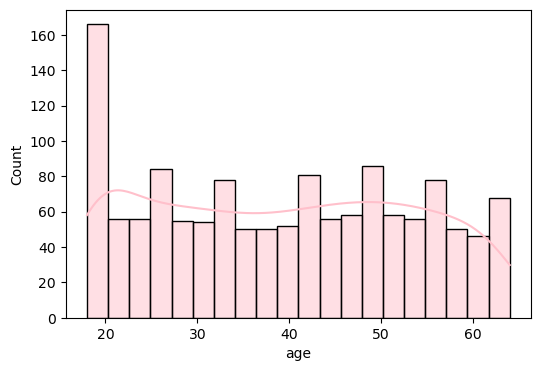

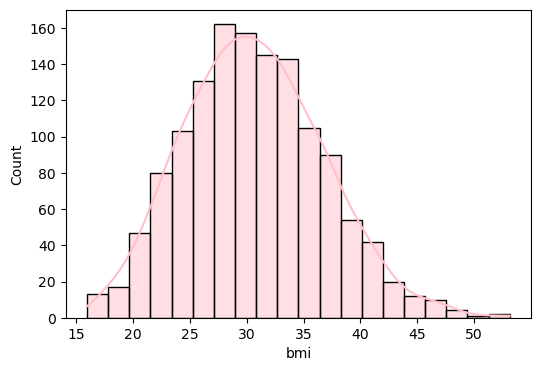

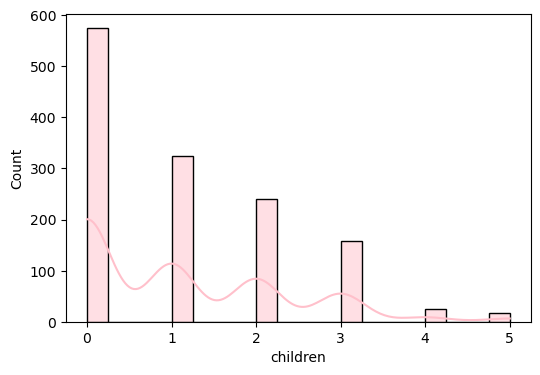

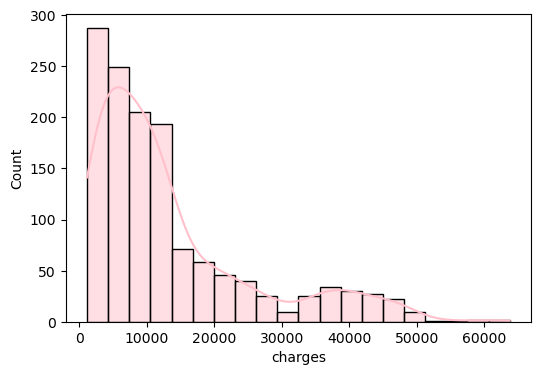

In [9]:
numeric_columns = ['age', 'bmi', 'children','charges']
for cols in numeric_columns :
    plt.figure(figsize=(6,4))
    sns.histplot(df[cols] , kde=True , bins=20, color='pink')

<Axes: xlabel='children', ylabel='count'>

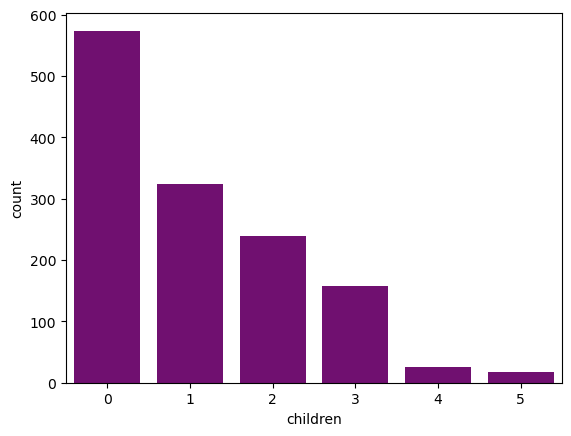

In [10]:
sns.countplot(x= df['children'] , color='purple')

<Axes: xlabel='sex', ylabel='count'>

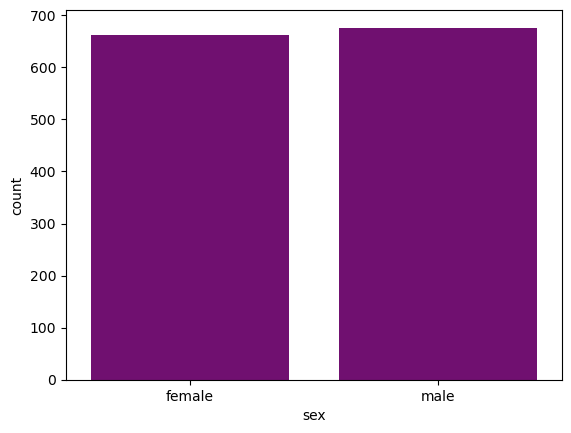

In [11]:
sns.countplot(x= df['sex'] , color='purple')

<Axes: xlabel='smoker', ylabel='count'>

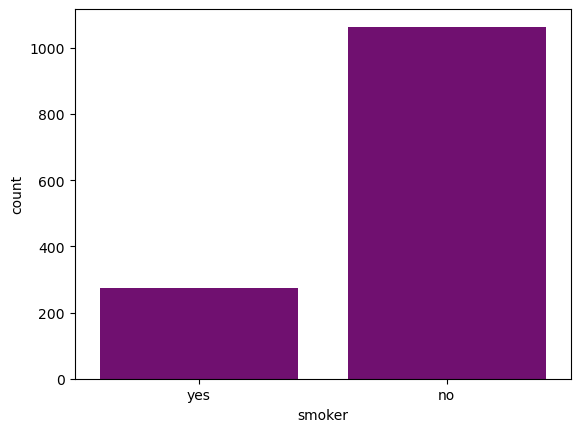

In [12]:
sns.countplot(x= df['smoker'], color='purple')

<Axes: xlabel='region', ylabel='count'>

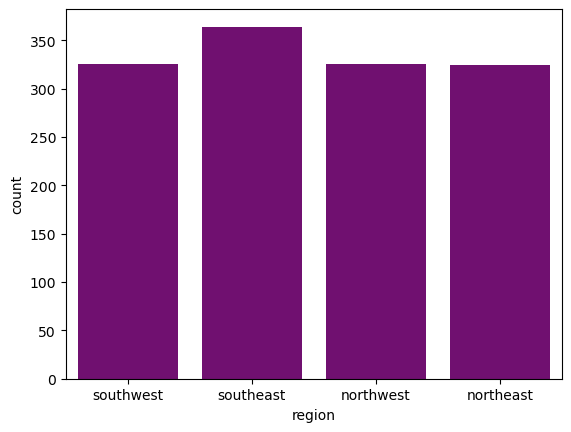

In [13]:
sns.countplot(x= df['region'], color='purple')

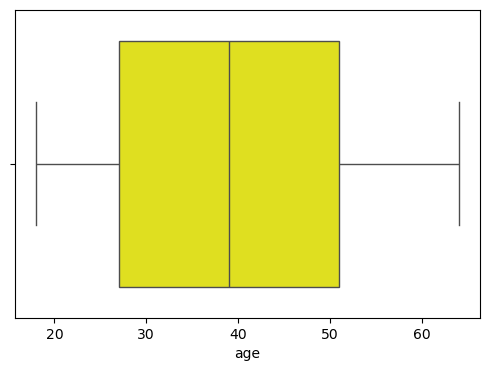

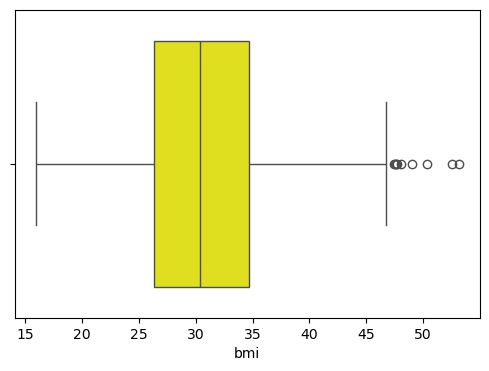

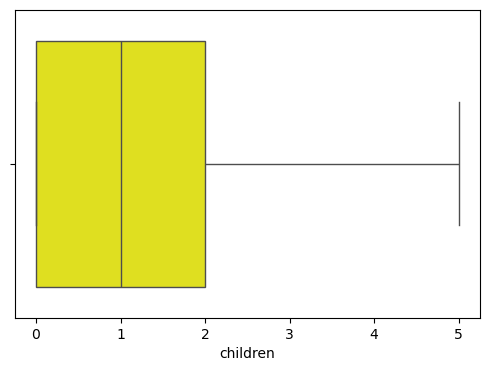

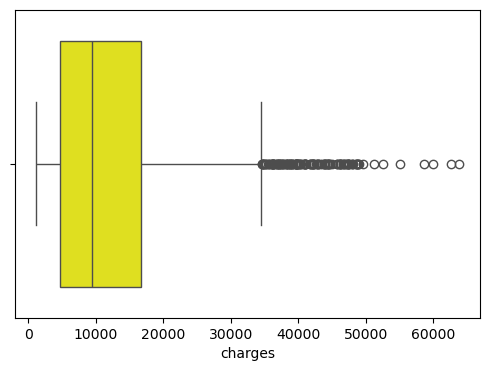

In [14]:
for cols in numeric_columns :
    plt.figure(figsize=(6,4))
    sns.boxplot(x= df[cols] , color='yellow')

<Axes: >

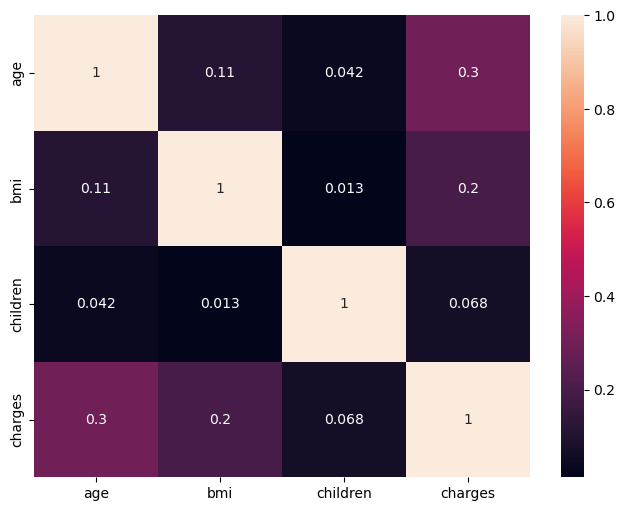

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True) , annot= True)

# DATA CLEANING AND PREPROCESSING

In [16]:
data_cleaned = df.copy()

In [17]:
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
data_cleaned.shape

(1338, 7)

In [19]:
data_cleaned.drop_duplicates(inplace=True)

In [20]:
data_cleaned.shape

(1337, 7)

In [21]:
data_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
data_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [23]:
data_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

# label - encoding  {CONVERTING QUALITATIVE DATA INTO NUMERIC DATA }

In [24]:
data_cleaned['sex'] = data_cleaned['sex'].map({"male" : 0 , "female" : 1})

In [25]:
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [26]:
data_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [27]:
data_cleaned['smoker'] = data_cleaned['smoker'].map({"no" : 0 , "yes" : 1})

In [28]:
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [29]:
data_cleaned.rename(columns={
    "sex" : "is_female",
    "smoker" : "is_smoker",
},inplace=True)

In [30]:
data_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


# One Hot Encodind for Region Column , {because more than two varients and normal label encoding like(0,1,2,3) can cause anomalities}

In [31]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [32]:
data_cleaned = pd.get_dummies(data_cleaned , columns=['region'] , drop_first=True)

In [33]:
data_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [34]:
data_cleaned.astype(int)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


# FEATURE ENGINEERING AND EXTRACTION

<Axes: xlabel='bmi', ylabel='Count'>

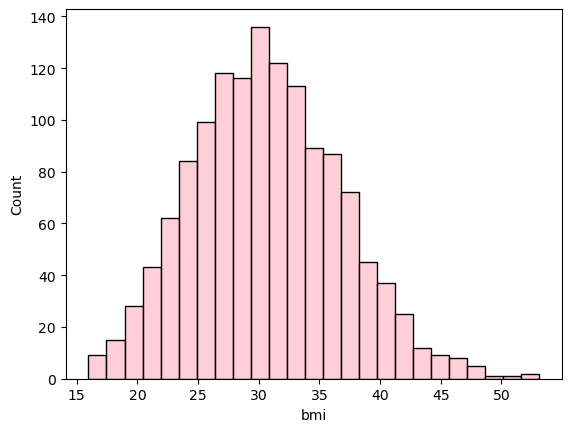

In [35]:
sns.histplot(df['bmi'], color='pink')

In [36]:
data_cleaned['bmi-category'] = pd.cut(
    data_cleaned['bmi'],
    bins = [0 , 18.5 , 24.9 , 29.9 , float('inf')],
    labels= ['Underweight' , 'Normal' , 'Overweight' , 'Obese']
)

In [37]:
data_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi-category
0,19,1,27.900,0,1,16884.92400,False,False,True,Overweight
1,18,0,33.770,1,0,1725.55230,False,True,False,Obese
2,28,0,33.000,3,0,4449.46200,False,True,False,Obese
3,33,0,22.705,0,0,21984.47061,True,False,False,Normal
4,32,0,28.880,0,0,3866.85520,True,False,False,Overweight


In [38]:
data_cleaned = pd.get_dummies(data_cleaned , columns=['bmi-category'] , drop_first=True)


In [39]:
data_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi-category_Normal,bmi-category_Overweight,bmi-category_Obese
0,19,1,27.900,0,1,16884.92400,False,False,True,False,True,False
1,18,0,33.770,1,0,1725.55230,False,True,False,False,False,True
2,28,0,33.000,3,0,4449.46200,False,True,False,False,False,True
3,33,0,22.705,0,0,21984.47061,True,False,False,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False,False,True,False


In [40]:
data_cleaned = data_cleaned.astype(int)

In [41]:
data_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi-category_Normal,bmi-category_Overweight,bmi-category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


# FEATURE SCALING

In [42]:
data_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi-category_Normal', 'bmi-category_Overweight', 'bmi-category_Obese'],
      dtype='object')

In [43]:
from sklearn.preprocessing import StandardScaler
cols = ['age' , 'bmi' , 'children']

scaler = StandardScaler()

data_cleaned[cols] = scaler.fit_transform(data_cleaned[cols])

In [44]:
data_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi-category_Normal,bmi-category_Overweight,bmi-category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [45]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi-category_Normal', 'bmi-category_Overweight', 'bmi-category_Obese'
]

correlations = {
    feature: pearsonr(data_cleaned[feature], data_cleaned['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi-category_Obese,0.197660
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi-category_Normal,-0.105656


In [46]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi-category_Normal', 'bmi-category_Overweight', 'bmi-category_Obese'
]

In [47]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

data_cleaned['charges_bin'] = pd.qcut(data_cleaned['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(data_cleaned[col], data_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi-category_Obese,7.654464,0.05372,Accept Null (Drop Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi-category_Normal,4.263673,0.234364,Accept Null (Drop Feature)
bmi-category_Overweight,4.201575,0.240504,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [48]:
final_df = data_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi-category_Obese']]

In [49]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi-category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0


In [50]:
from sklearn.model_selection import train_test_split

In [54]:
X = final_df.drop('charges',axis=1)
y = final_df['charges']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.8039554340694273

In [64]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2)*(n-1)/(n-p-1))
adjusted_r2

0.7986773111405272